In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


In [5]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 986.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [2]:
import os
import pandas as pd
import re
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from tensorflow.keras.optimizers import*
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, BatchNormalization
from collections import Counter


In [6]:
from google.colab import files
uploaded = files.upload()

Saving dataset_river_final.csv to dataset_river_final.csv


In [3]:
df = pd.read_csv("dataset_river_final.csv", header = 0)
df

,game_id,stack,river_position,nb_players_start,cards,pot_size_before_decision,nb_unfolded_players,money_to_add_to_call,hand_strength,hand_pos_potential,hand_neg_potential,last_raise__turn_player,last_raise_riverplayer,flop,turn,river,mise en cas de raise/bet,decision
0,808938724,15.70,0,4,Th Kh,10.90,2,0.00,0.410101,0,0,-1,-1,6d Ad 5d,7c,5h,0.0,checks
1,808938165,6.01,0,7,Ah Jh,6.25,2,2.42,0.626263,0,0,-1,1,8c Js Qd,9d,6s,0.0,folds
2,808936976,6.53,0,6,Jd 6c,3.17,2,1.23,0.616162,0,0,1,1,6s 8d 3c,Ks,2s,0.0,folds
3,808931232,23.57,1,6,Ah 3c,12.86,2,10.00,0.912626,0,0,1,-1,5c 2c 6h,4h,Jd,10.0,bets
4,808931130,4.70,0,3,9c As,1.94,3,0.00,0.336869,0,0,-1,-1,5s Qc 7d,Ts,Js,0.0,checks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,788450478,10.22,0,4,9d 9s,9.81,2,0.00,0.724747,0,0,0,-1,3s 6c 4d,Qh,6s,0.0,checks
2160,788428425,50.30,0,9,Qh Qs,118.32,3,58.14,0.594444,0,0,-1,1,Kh 9s 8h,7c,Jh,0.0,folds
2161,788424042,50.73,1,8,6h Th,18.54,2,0.00,0.804040,0,0,1,-1,2c 4h Tc,3h,8s,0.0,checks
2162,788424042,50.73,1,8,6h Th,34.17,2,15.63,0.804040,0,0,1,0,2c 4h Tc,3h,8s,0.0,calls


In [4]:
df["top_card_player"] = 0
df["top_card_board"] = 0
df["diff_between_cards_player"] = 0
df["diff_1_2_highest_board"] = 0
df["diff_2_3_highest_board"] = 0
df["diff_3_4_highest_board"] = 0
df["diff_4_5_highest_board"] = 0
df["color"] = 0
df['decision'] = df['decision'].replace({'checks': 'calls', 'bets': 'raises'})
df

,game_id,stack,river_position,nb_players_start,cards,pot_size_before_decision,nb_unfolded_players,money_to_add_to_call,hand_strength,hand_pos_potential,...,mise en cas de raise/bet,decision,top_card_player,top_card_board,diff_between_cards_player,diff_1_2_highest_board,diff_2_3_highest_board,diff_3_4_highest_board,diff_4_5_highest_board,color
0,808938724,15.70,0,4,Th Kh,10.90,2,0.00,0.410101,0,...,0.0,calls,0,0,0,0,0,0,0,0
1,808938165,6.01,0,7,Ah Jh,6.25,2,2.42,0.626263,0,...,0.0,folds,0,0,0,0,0,0,0,0
2,808936976,6.53,0,6,Jd 6c,3.17,2,1.23,0.616162,0,...,0.0,folds,0,0,0,0,0,0,0,0
3,808931232,23.57,1,6,Ah 3c,12.86,2,10.00,0.912626,0,...,10.0,raises,0,0,0,0,0,0,0,0
4,808931130,4.70,0,3,9c As,1.94,3,0.00,0.336869,0,...,0.0,calls,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,788450478,10.22,0,4,9d 9s,9.81,2,0.00,0.724747,0,...,0.0,calls,0,0,0,0,0,0,0,0
2160,788428425,50.30,0,9,Qh Qs,118.32,3,58.14,0.594444,0,...,0.0,folds,0,0,0,0,0,0,0,0
2161,788424042,50.73,1,8,6h Th,18.54,2,0.00,0.804040,0,...,0.0,calls,0,0,0,0,0,0,0,0
2162,788424042,50.73,1,8,6h Th,34.17,2,15.63,0.804040,0,...,0.0,calls,0,0,0,0,0,0,0,0


In [5]:
def quantifier_correspondances_couleur(A, B, C):
    # Combiner les tableaux A, B et C pour obtenir toutes les couleurs
    toutes_couleurs = A + B + C

    # Compter les occurrences de chaque couleur
    comptage_couleurs = Counter(toutes_couleurs)

    # Obtenir le nombre maximum d'occurrences d'une même couleur
    max_occurrences = max(comptage_couleurs.values())
    occurrences = list(comptage_couleurs.values())

    # Appliquer la règle de conversion
    if max_occurrences == 5:
        return 5
    elif max_occurrences == 4:
        return 4
    elif max_occurrences == 3:
        if occurrences.count(3) == 1 and occurrences.count(2) == 1:
            return 3
        else:
            return 2
    elif max_occurrences == 2:
        if occurrences.count(2) == 2:
            return 1
        else:
            return 0

# Exemple d'utilisation
A = ['rouge', 'jaune', 'bleu']  # Couleurs des cartes du flop
B = ['rouge']                 # Couleur de la carte du turn
C = ['vert']                  # Couleur de la carte du river

resultat = quantifier_correspondances_couleur(A, B, C)
print("Score :", resultat)

Score : 0


In [6]:
cards = df["cards"]
deck = df["flop"]
#cards

def get_value(s):
  if s == 'A':
    return 14
  if s=='K':
    return 13
  if s== 'Q':
    return 12
  if s== 'J':
    return 11
  if (s == '1') | (s == 'T'):
    return 10
  return int(s)


for i in range(df.shape[0]):
  index = 0
  j = 0
  k = 0
  l = 0
  values = []
  values_deck = []
  value_turn = []
  value_river = []
  c = df['cards'][i]
  d = df['flop'][i]
  t = df["turn"][i]
  r = df["river"][i]
  if c[0] == "1":
    values.append(10)
    index+=1
  else :
    values.append(get_value(c[0]))

  index += 1
  values.append(c[index])
  index+=2
  if c[index] == "1":
    values.append(10)
    index+=1
  else :
    values.append(get_value(c[index]))

  index += 1
  values.append(c[index])

  if t[0] == "1":
    value_turn.append(10)
    k+=1
  else :
    value_turn.append(get_value(t[0]))
  k+=1
  value_turn.append(t[k])

  if r[0] == "1":
    value_river.append(10)
    l+=1
  else :
    value_river.append(get_value(r[0]))
  l+=1
  value_river.append(r[l])

  if d[0] == "1":
    values_deck.append(10)
    j += 1
  else :
    values_deck.append(get_value(d[0]))

  j += 1
  values_deck.append(d[j])
  j +=2
  if d[j] == "1":
    values_deck.append(10)
    j += 1
  else :
    values_deck.append(get_value(d[j]))

  j += 1
  values_deck.append(d[j])

  j +=2
  if d[j] == "1":
    values_deck.append(10)
    j += 1
  else :
    values_deck.append(get_value(d[j]))

  j += 1
  values_deck.append(d[j])

  num  = [values_deck[0], values_deck[2], values_deck[4], value_turn[0], value_river[0]]
  num_sorted = sorted(num, reverse=True)
  df["top_card_player"][i] = max(values[0], values[2])
  df["diff_between_cards_player"][i] = max(values[0], values[2]) - min(values[0], values[2])
  df["diff_2_3_highest_board"][i] = num_sorted[1] - num_sorted[2]

  df["top_card_board"][i] = num_sorted[0]
  df["diff_1_2_highest_board"][i] = num_sorted[0] - num_sorted[1]
  df["diff_3_4_highest_board"][i] = num_sorted[1]-num_sorted[2]
  df["diff_4_5_highest_board"][i] = num_sorted[2]-num_sorted[3]

  A = [values_deck[i+1] for i in range(0, len(values_deck), 2)]
  B = [value_turn[i+1] for i in range(0, len(value_turn), 2)]
  C = [value_river[i+1] for i in range(0, len(value_river), 2)]

  df["color"][i] = quantifier_correspondances_couleur(A, B, C)


  if df['decision'][i] == 'folds' :
    df['decision'][i] = 0
  elif df['decision'][i] == 'calls' :
    df['decision'][i] = 1
  elif df['decision'][i] == 'raises' :
    df['decision'][i] = 2
  if i == 0 :
    print(values_deck)


df


<ipython-input-6-dcb73d2392fc>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["top_card_player"][i] = max(values[0], values[2])
<ipython-input-6-dcb73d2392fc>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diff_between_cards_player"][i] = max(values[0], values[2]) - min(values[0], values[2])
<ipython-input-6-dcb73d2392fc>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diff_2_3_highest_board"][i] = num_sorted[1] - nu

[6, 'd', 14, 'd', 5, 'd']


Streaming output truncated to the last 5000 lines.
<ipython-input-6-dcb73d2392fc>:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decision'][i] = 2
<ipython-input-6-dcb73d2392fc>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["top_card_player"][i] = max(values[0], values[2])
<ipython-input-6-dcb73d2392fc>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diff_between_cards_player"][i] = max(values[0], values[2]) - min(

,game_id,stack,river_position,nb_players_start,cards,pot_size_before_decision,nb_unfolded_players,money_to_add_to_call,hand_strength,hand_pos_potential,...,mise en cas de raise/bet,decision,top_card_player,top_card_board,diff_between_cards_player,diff_1_2_highest_board,diff_2_3_highest_board,diff_3_4_highest_board,diff_4_5_highest_board,color
0,808938724,15.70,0,4,Th Kh,10.90,2,0.00,0.410101,0,...,0.0,1,13,14,3,7,1,1,1,2
1,808938165,6.01,0,7,Ah Jh,6.25,2,2.42,0.626263,0,...,0.0,0,14,12,3,1,2,2,1,1
2,808936976,6.53,0,6,Jd 6c,3.17,2,1.23,0.616162,0,...,0.0,0,11,13,5,5,2,2,3,2
3,808931232,23.57,1,6,Ah 3c,12.86,2,10.00,0.912626,0,...,10.0,2,14,11,11,5,1,1,1,1
4,808931130,4.70,0,3,9c As,1.94,3,0.00,0.336869,0,...,0.0,1,14,12,5,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,788450478,10.22,0,4,9d 9s,9.81,2,0.00,0.724747,0,...,0.0,1,9,12,0,6,0,0,2,0
2160,788428425,50.30,0,9,Qh Qs,118.32,3,58.14,0.594444,0,...,0.0,0,12,13,0,2,2,2,1,2
2161,788424042,50.73,1,8,6h Th,18.54,2,0.00,0.804040,0,...,0.0,1,10,10,4,2,4,4,1,1
2162,788424042,50.73,1,8,6h Th,34.17,2,15.63,0.804040,0,...,0.0,1,10,10,4,2,4,4,1,1


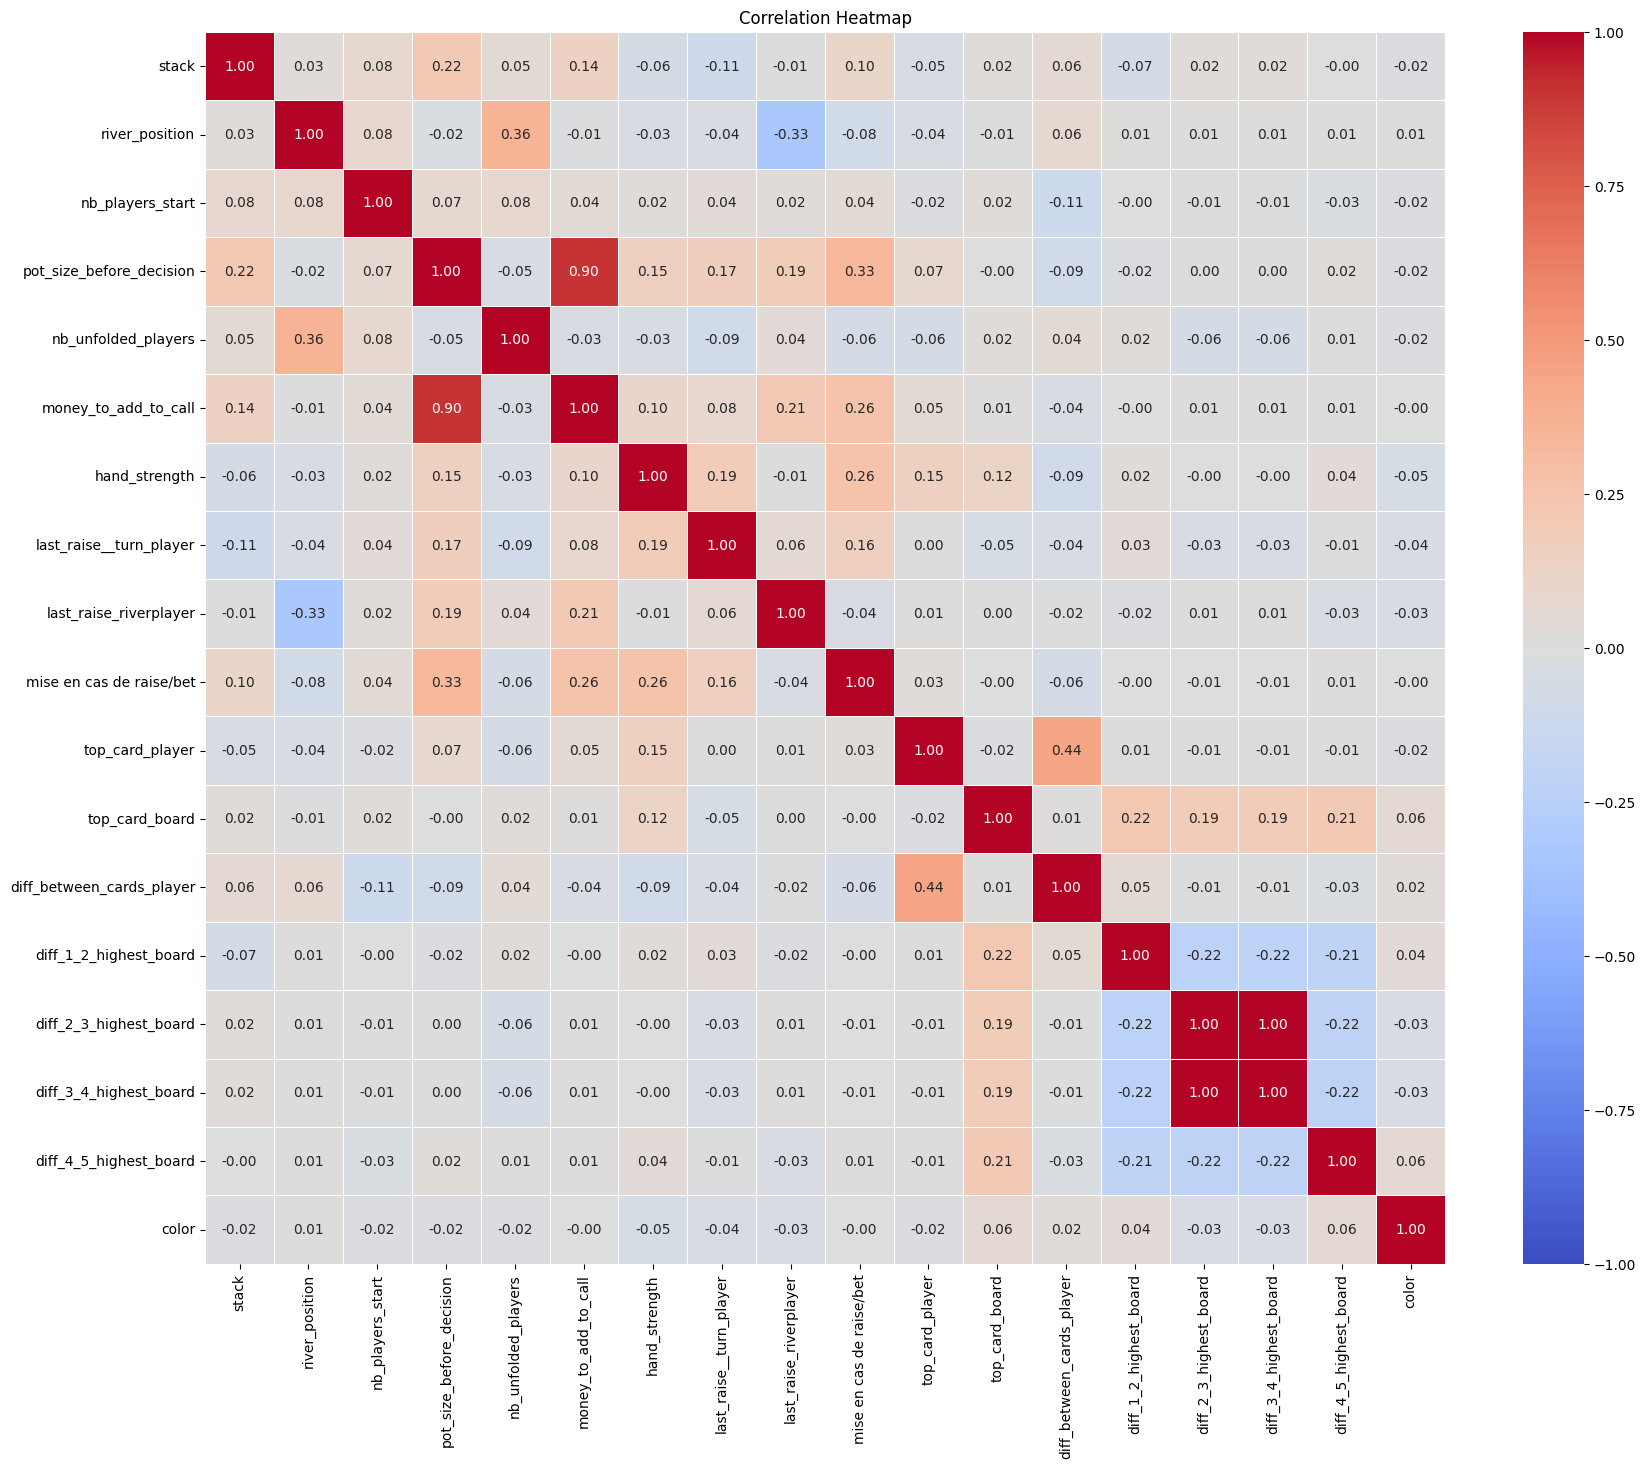

In [7]:
features = df.drop(columns=['game_id', 'decision', 'cards', 'flop', 'turn', 'river', 'hand_pos_potential', 'hand_neg_potential'])
M = features.corr()


plt.figure(figsize=(20, 16))
sns.heatmap(M, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# Training
features = df.drop(columns=['game_id', 'decision', 'cards', 'flop', 'turn', 'river', 'hand_pos_potential', 'hand_neg_potential','mise en cas de raise/bet']).values.astype(np.float32)
labels = df['decision']
labels = labels.values.astype(np.float32)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state = 42)

model = Sequential(
    [
      tf.keras.Input(shape=(X_train.shape[1],)),
      Dense(units=64,activation='relu',name='layer1'),
      Dropout(0.2),
      Dense(units=64,activation='relu',name='layer2'),
      Dropout(0.2),
      Dense(units=3,activation='softmax',name='layer4')

    ], name = "river_model1"
)

features = df.drop(columns=['game_id', 'decision', 'cards', 'flop', 'turn', 'river', 'hand_pos_potential', 'hand_neg_potential','mise en cas de raise/bet']).values.astype(np.float32)
labels = df['decision']
labels = labels.values.astype(np.float32)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state = 42)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

early_stopping = EarlyStopping(monitor='accuracy', patience=100, restore_best_weights=True)

history = model.fit(   X_train,Y_train,    epochs=1000, callbacks=[early_stopping], validation_data=(X_test, Y_test))

Epoch 1/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3937 - loss: 3.1623 - val_accuracy: 0.5638 - val_loss: 1.0194
Epoch 2/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5183 - loss: 1.4895 - val_accuracy: 0.5823 - val_loss: 0.9379
Epoch 3/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5636 - loss: 1.1352 - val_accuracy: 0.5860 - val_loss: 0.8798
Epoch 4/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5960 - loss: 0.9485 - val_accuracy: 0.6285 - val_loss: 0.8843
Epoch 5/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6110 - loss: 0.9669 - val_accuracy: 0.6229 - val_loss: 0.8009
Epoch 6/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6215 - loss: 0.8306 - val_accuracy: 0.5970 - val_loss: 0.7929
Epoch 7/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6176 - loss: 0.8154 - val_accuracy: 0.6580 - val_loss: 0.7530
Epoch 8/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6698 - loss: 0.7837 - val_accuracy: 0

In [9]:
a = max(history.history['accuracy'])
b = max(history.history['val_accuracy'])
print(a)
print(b)

0.9753542542457581
0.8595194220542908


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


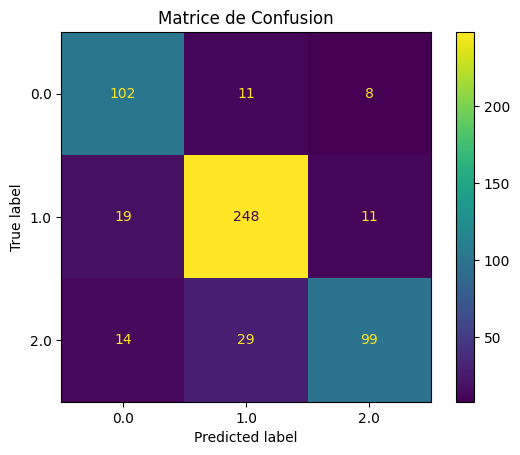

0.8115795166258947


In [10]:
y_true = Y_test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.title('Matrice de Confusion')
plt.show()

f1 = f1_score(y_true, y_pred, average='macro')
print(f1)

In [11]:
model.save('Cmodele_river.keras')


In [12]:
model.save('modele_river_final.keras')


In [14]:
model.save('modele_river_final.h5')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model(r'C:\Usemodele_river.h5')

In [ ]:
model.weights

In [ ]:
model.save(r'C:\Users\Zahra\Downloads\modele_river.keras')